## SUPPORT VECTOR MACHINES CHALLENGE

In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [125]:
df = pd.read_csv("C:/Users/ushai/Dropbox/Data Science/Datasets/epicurious dataset/epi_r.csv")

In [126]:
df.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# running describe() function on 'rating' column
df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [128]:
# Obtain value_counts() for 'rating' column
df.rating.value_counts()

4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64

In [129]:
df.shape

(20052, 680)

In [163]:
# Counting Null Values 
null_count = df.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

### BINARY CLASSIFICATION

In [164]:
# No Null values have been dropped
# With Binary classification of 0 and 1
df['rating_class'] = np.where(df.rating >= 3.7, 1,0)

In [131]:
svc = SVR()
X = df.drop(['rating','title','calories','protein','fat','sodium'],1)
Y = df.rating_class
svc.fit(X,Y)

C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
svc.score(X,Y)
cross_val_score(svc, X, Y, cv=5)

C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

array([0.93881579, 0.94118854, 0.93893305, 0.94117913, 0.94225366])

### PERCENTAGE OF RATING CLASS 

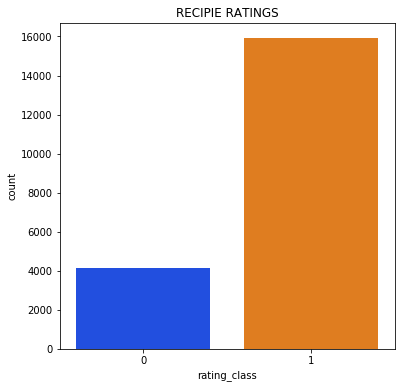

percentage of Low ratings: 20.67
percentage of High ratings: 79.33


<Figure size 432x288 with 0 Axes>

In [133]:
# Percentage for "rating_class"

plt.figure(figsize=(6,6))
plt.title("RECIPIE RATINGS")
sns.countplot(x='rating_class', data=df, palette = 'bright')
plt.show()
plt.savefig('count')

Low = df[df['rating_class'] == 0].shape[0]
High = df[df['rating_class'] == 1].shape[0]

pct_Low = (Low/(Low + High))*100
pct_High = (High/(Low + High))*100


print("percentage of Low ratings:", np.round(pct_Low,2))
print("percentage of High ratings:", np.round(pct_High,2))

### MULTIPLE CLASSIFICATION

In [134]:
df['rating_integer'] = df.rating.astype(int)

In [135]:
X = df.drop(['rating','rating_class','title','calories','protein','fat','sodium'],1)
Y = df.rating_integer
svc.fit(X,Y)

C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Make predictions on the testing set
y_pred = lassoreg.predict(X_test)

In [136]:
svc.score(X,Y)
cross_val_score(svc, X, Y, cv=5)

C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ushai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

array([0.99845358, 0.99847173, 0.99845242, 0.99850286, 0.99850342])

In [137]:
df.rating_integer.value_counts()

4    8019
3    6658
5    2719
0    1836
2     532
1     288
Name: rating_integer, dtype: int64

### PERCENTAGE OF RATING INTEGER 

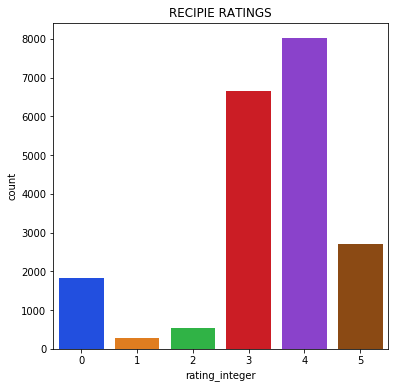

percentage of Worst ratings: 9.16
percentage of Bad ratings: 1.44
percentage of Low ratings: 2.65
percentage of Medium ratings: 33.2
percentage of High ratings: 39.99


<Figure size 432x288 with 0 Axes>

In [138]:
# Percentage for "rating_integer"

plt.figure(figsize=(6,6))
plt.title("RECIPIE RATINGS")
sns.countplot(x='rating_integer', data=df, palette = 'bright')
plt.show()
plt.savefig('count')

Worst = df[df['rating_integer'] == 0].shape[0]
Bad = df[df['rating_integer'] == 1].shape[0]
Low = df[df['rating_integer'] == 2].shape[0]
Medium = df[df['rating_integer'] == 3].shape[0]
High = df[df['rating_integer'] == 4].shape[0]
V_High = df[df['rating_integer'] == 5].shape[0]

pct_Worst = (Worst/(Worst + Bad + Low + Medium + High + V_High))*100
pct_Bad = (Bad/(Worst + Bad + Low + Medium + High + V_High))*100
pct_Low = (Low/(Worst + Bad + Low + Medium + High + V_High))*100
pct_Medium = (Medium/(Worst + Bad + Low + Medium + High + V_High))*100
pct_High = (High/(Worst + Bad + Low + Medium + High + V_High))*100
pct_V_High = (V_High/(Worst + Bad + Low + Medium + High + V_High))*100

print("percentage of Worst ratings:", np.round(pct_Worst,2))
print("percentage of Bad ratings:", np.round(pct_Bad,2))
print("percentage of Low ratings:", np.round(pct_Low,2))
print("percentage of Medium ratings:", np.round(pct_Medium,2))
print("percentage of High ratings:", np.round(pct_High,2))

### RIDGE REGRESSION - FEATURE SELECTION

In [149]:
# Choosing a model
# As λ gets larger, the penalty for coefficient size also gets larger (Higher λ = lowered coefficent)
# and the solution that minimizes the cost function will by necessity have smaller coefficient estimates. 
# Regularization based on the sum of the squared weights is also called "L2 regularization".

ridge = linear_model.Ridge(alpha=1, fit_intercept=False) 

In [150]:
# Fitting the model
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [151]:
# R Square
R_Square = (ridge.score(X_train, y_train))
print ("R Square:{}".format(R_Square))

R Square:0.9482935196126845


In [152]:
# Regression Coefficents
print(ridge.coef_, ridge.intercept_)

[ 3.64690065e-02  0.00000000e+00  2.07244078e-01  1.31764418e-02
 -8.86720169e-03  2.26413145e-03 -1.23523811e-01  6.89972589e-03
 -3.71211948e-02  4.64449357e-03  7.76802589e-02 -5.84244103e-02
  1.33305619e-02  5.90182171e-02 -2.92128685e-02  7.56244787e-02
  3.98930668e-02  4.29341042e-02  1.36723612e-01  2.64915753e-02
 -2.26869462e-03  2.63142781e-02  6.62300999e-03 -8.20278466e-02
  4.12594848e-02  6.34944628e-02 -4.86786691e-02 -4.02888195e-02
  8.66448144e-03  5.66341968e-02 -1.63240984e-02  4.06769592e-02
  9.51820512e-02  4.70258819e-02  4.57520702e-02  2.94543035e-02
 -1.42113120e-02 -1.91727428e-02  5.57423252e-02  4.14624642e-02
  8.68302074e-02  4.82570458e-02  4.02553547e-03  5.62597482e-02
  4.04260383e-02 -2.32660505e-03  8.98138834e-03  1.39896562e-01
  3.52426173e-02 -1.75063522e-01  4.37812801e-02 -2.08960370e-02
 -2.68398560e-04  2.29157301e-02  2.48094450e-02  1.70306535e-02
  4.86977292e-02  1.30193260e-01  7.33046228e-02  1.89363447e-01
  6.88393384e-02  5.39139

In [153]:
# Make predictions on the testing set
y_pred = ridge.predict(X_test)

In [154]:
# Print Error's
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 0.2136984739023551


In [155]:
coeff_ridge = pd.DataFrame(X_train.columns)
coeff_ridge['Coefficient Estimate'] = pd.Series(ridge.coef_)

In [156]:
coeff_ridge

,0,Coefficient Estimate
0,#cakeweek,0.036469
1,#wasteless,0.000000
2,22-minute meals,0.207244
3,3-ingredient recipes,0.013176
4,30 days of groceries,-0.008867
5,advance prep required,0.002264
6,alabama,-0.123524
7,alaska,0.006900
8,alcoholic,-0.037121
9,almond,0.004644


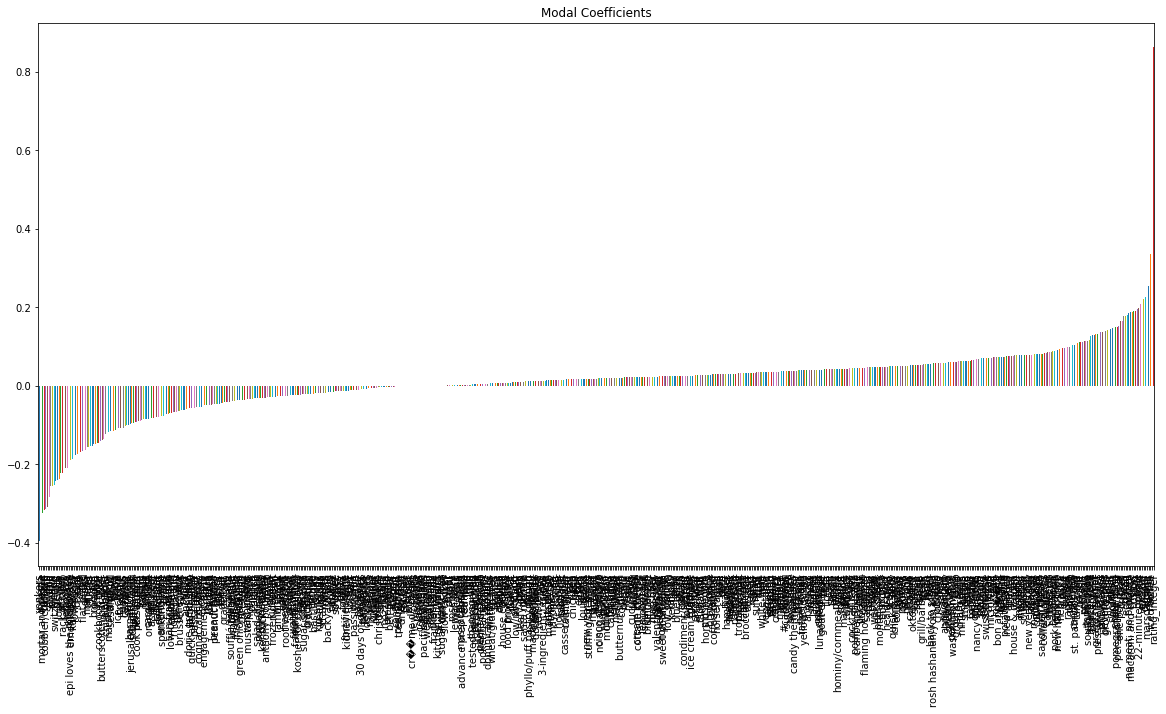

In [161]:
# checking the magnitude of coefficients
plt.figure(figsize=(20,10))
predictors = X_train.columns
coef = Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### LASSO REGRESSION - FEATURE SELECTION

In [139]:
# running train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [140]:
# Choosing a model
lassoreg = linear_model.Lasso(alpha=1, normalize=False)

In [141]:
# Fitting the model
lassoreg.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
# Logistic Regression R Square
R_Square = (lassoreg.score(X_train, y_train))
print ("R Square:{}".format(R_Square))

R Square:0.529486468925786


In [143]:
# Regression Coefficents
print(lassoreg.coef_, lassoreg.intercept_)

[ 0.         0.         0.        -0.         0.        -0.
 -0.        -0.        -0.         0.         0.        -0.
 -0.        -0.        -0.        -0.         0.         0.
 -0.         0.         0.        -0.         0.        -0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        -0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        -0.        -0.         0.         0.         0.
  0.         0.         0.         0.        -0.         0.
 -0.         0.         0.        -0.        -0.        -0.
 -0.        -0.         0.         0.         0.         0.
  0.        -0.        -0.        -0.         0.         0.
  0.         0.         0.         0.         0.        -0.
 -0.         0.        -0.        -0.         0.         0.
  0.         0.        -0.        -0.         0.        -0.
 -0.        -0.         0.         0.   

In [144]:
# Make predictions on the testing set
y_pred = lassoreg.predict(X_test)

In [145]:
# Print Error's
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 0.5572733309748635


In [146]:
coeff_lasso = pd.DataFrame(X_train.columns)
coeff_lasso['Coefficient Estimate'] = pd.Series(lassoreg.coef_)

In [147]:
coeff_lasso

,0,Coefficient Estimate
0,#cakeweek,0.000000
1,#wasteless,0.000000
2,22-minute meals,0.000000
3,3-ingredient recipes,-0.000000
4,30 days of groceries,0.000000
5,advance prep required,-0.000000
6,alabama,-0.000000
7,alaska,-0.000000
8,alcoholic,-0.000000
9,almond,0.000000


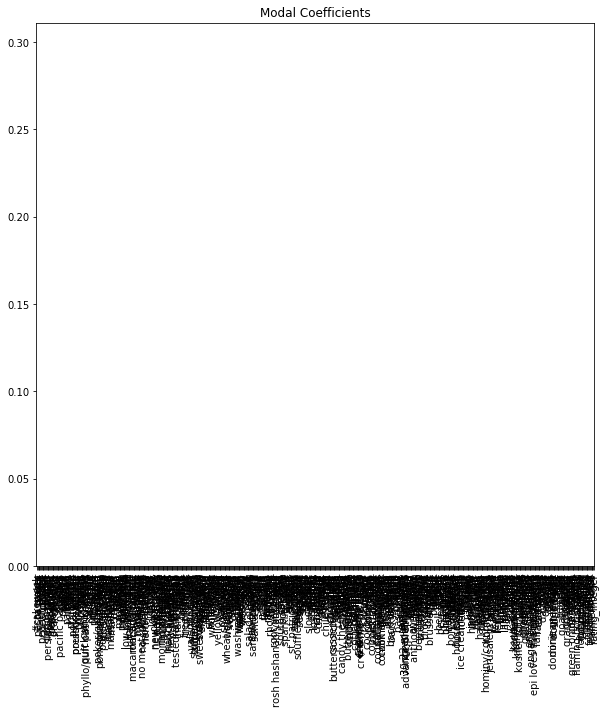

In [160]:
# checking the magnitude of coefficients
plt.figure(figsize=(10,10))
predictors = X_train.columns
coef = Series(lassoreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')